In [1]:
# loading libraries
import pandas as pd
import numpy as np
import gurobipy as gp
import matplotlib.pyplot as plt

time_limit = 10

**Optimization model function**

In [2]:
def create_model(A, sense, b, obj, opt=gp.GRB.MAXIMIZE, ub=None, lb=None, vtype=None, time_limit=3600):
    # creating model
    model = gp.Model()
    
    if vtype is None:
        vtype = ['C'] * A.shape[1]

    # creating variable an setting the constraints
    if ub is None:
        modx = model.addMVar(A.shape[1], vtype=vtype)
    else:
        modx = model.addMVar(A.shape[1], ub=ub, vtype=vtype)
    mod_con = model.addMConstrs(A, modx, sense, b)

    # setting the objective function
    model.setMObjective(None, obj, 0, sense=opt)
 
    # restricting gurobi logs
    model.Params.OutputFlag = 0
    model.setParam('TimeLimit', time_limit)

    # optimizing the function
    model.optimize()
    
    return model

# Loading datasets

In [3]:
# function to provide returns from the prices
def get_returns(df):
    
    shift_df = df.shift(1)
    return_df = (df - shift_df)/shift_df
    return_df.dropna(inplace=True)
    
    return return_df

**For 2019 stock data**

In [4]:
# loading the dataset for 2019
data_2019 = pd.read_csv('stocks2019.csv')

# converting date to datetime object
data_2019['X'] = pd.to_datetime(data_2019['X'])

data_2019.head()

,X,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
0,2019-01-02,6360.870117,46.350380,224.570007,18.830000,98.050003,202.119995,1054.680054,1045.849976,1539.130005,...,27.590000,247.970001,147.759995,107.364159,164.080002,63.920757,159.740005,36.312473,46.041862,84.600266
1,2019-01-03,6147.129883,44.704514,215.699997,17.049999,100.209999,184.779999,1025.469971,1016.059998,1500.280029,...,26.959999,243.360001,142.589996,104.083450,163.729996,63.253742,154.020004,33.835327,45.860447,81.414970
2,2019-01-04,6422.669922,46.488358,226.190002,19.000000,106.000000,186.710007,1078.069946,1070.709961,1575.390015,...,28.549999,255.029999,148.970001,108.678413,172.699997,65.358139,163.350006,35.268467,46.309223,85.184715
3,2019-01-07,6488.250000,47.799141,229.259995,20.570000,107.940002,189.919998,1075.920044,1068.390015,1629.510010,...,29.180000,271.000000,151.399994,108.787117,175.850006,65.733910,163.500000,36.521275,46.108707,87.434891
4,2019-01-08,6551.850098,49.247898,232.679993,20.750000,108.610001,192.949997,1085.369995,1076.280029,1656.579956,...,29.480000,276.000000,156.919998,109.755516,178.190002,67.049149,166.949997,36.170105,46.643410,85.769180


In [5]:
# printing numer of stocks and trading days
print('# of stocks', data_2019.shape[1]-2)
print('# of trading days', data_2019.shape[0])

# getting returns for index and stocks values for 2019
returns_2019 = get_returns(data_2019.iloc[:, 1:])
index_2019 = returns_2019[['NDX']].values
stocks_2019 = returns_2019.iloc[:, 1:].values

# getting correlation matrix
rho_2019 = returns_2019.iloc[:, 1:].corr().values

# getting dates
dates_2019 = data_2019['X'].values

# of stocks 100
# of trading days 251


**For 2020 stock data**

In [6]:
# loading the dataset for 2020
data_2020 = pd.read_csv('stocks2020.csv')

# converting date to datetime object
data_2020['Unnamed: 0'] = pd.to_datetime(data_2020['Unnamed: 0'])

data_2020.head()

,Unnamed: 0,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
0,2020-01-02,8872.219727,58.266792,334.429993,49.099998,107.839996,283.679993,1368.680054,1367.369995,1898.010010,...,36.970001,254.550003,196.729996,150.167465,219.449997,56.046688,167.460007,64.771545,60.782249,100.115349
1,2020-01-03,8793.900391,58.286655,331.809998,48.599998,106.410004,280.440002,1361.520020,1360.660034,1874.969971,...,36.180000,250.169998,200.880005,151.628220,217.979996,56.046688,168.440002,63.774597,61.074562,97.810677
2,2020-01-06,8848.519531,59.349670,333.709991,48.389999,106.580002,285.880005,1397.810059,1394.209961,1902.880005,...,35.689999,250.949997,202.740005,151.976013,224.029999,56.530506,169.490005,62.550629,60.986866,95.771927
3,2020-01-07,8846.450195,59.945747,333.390015,48.250000,106.849998,283.059998,1395.109985,1393.339966,1906.859985,...,37.330002,253.089996,203.210007,153.247955,223.789993,56.245903,172.949997,66.785164,60.860199,97.958405
4,2020-01-08,8912.370117,59.488754,337.869995,47.830002,108.580002,286.000000,1405.040039,1404.319946,1891.969971,...,36.869999,258.000000,204.149994,154.658997,231.089996,52.963551,178.710007,67.752487,60.801735,97.682640


In [7]:
# printing numer of stocks and trading days
print('# of stocks', data_2020.shape[1]-2)
print('# of trading days', data_2020.shape[0])

# getting returns for index and stocks values for 2020
returns_2020 = get_returns(data_2020.iloc[:, 1:])
index_2020 = returns_2020[['NDX']].values
stocks_2020 = returns_2020.iloc[:, 1:].values

# getting correlation matrix
rho_2020 = returns_2020.iloc[:, 1:].corr().values

# getting dates
dates_2020 = data_2020.iloc[:, 0].values

# of stocks 100
# of trading days 252


# Stock Selection

**Decision Variables**

1. $y_i$ : whether stock 'j' is selected in the portfolio or not

2. $x_{ij}$ : is $i^{th}$ stock found to be most similar to $j^{th}$ stock

**Constrains**

1. Exactly *m* stocks in the fund

2. Each stock $i$ has exactly one representative stock $j$ in the index

3. Stock $j$ is represented by $j$ only and only if $j$ is in the fund

**Total Decision variables - $n^2$ + $n$**

**Total Constraints - $n^2$ + $n$ + 1**

**X vector order for decision variables**

X = [$y_{1}$, ... $y_{n}$ ,  $x_{11}$,$x_{12}$, ...,  $x_{21}$, $x_{22}$, ...., $x_{nn}$]

In [8]:
# setting number of stocks to be picked
m = 5
print('# of stocks to pick for approx.', m)

# getting total number of stocks
n = stocks_2019.shape[1]
print('# of stocks', n)

# of stocks to pick for approx. 5
# of stocks 100


### Setting Constraint matrix

In [9]:
# setting constraints matrix
A = np.zeros((n*n + n + 1, n*n + n))
b = np.zeros(n*n + n + 1)
sense = ['']*A.shape[0]
vtype = ['B']*A.shape[1]
obj = np.zeros(A.shape[1])

# checking constraint matrix size
print('Shape of constraint matrix', A.shape)

Shape of constraint matrix (10101, 10100)


**Constraint 1**

In [10]:
A[0, :n] = 1
b[0] = m
sense[0] = '='

**Constrain 2**

In [11]:
for i in range(1, n+1):
    col_start = i*n
    col_end = col_start + n
    # print(i, col_start, col_end)
    A[i, col_start:col_end] = np.array([1]*n)
    b[i] = 1
    sense[i] = '='

**Constraint 3**

In [12]:
k = 0
A[n+1:, n:] = np.diag(np.full(n*n,1))
for i in range(n):
    for j in range(n):
        A[n + 1 + k, j] = -1
        k+= 1

sense[n+1:] = ['<']*n**2

In [13]:
# k = 0
# for i in range(n):
#     for j in range(n):
#         A[n + 1 + k, (i + 1)*n + j] = 1
#         A[n + 1 + k, j] = -1
#         sense[n + 1 + k] = '<'
        
#         k += 1 

**Setting objective**

In [14]:
obj[n:] = rho_2019.ravel()

In [15]:
A.sum()

10100.0

**Running the model to select $m$ indexes**

In [16]:
# running the model
selection_model = create_model(A, sense, b, obj, vtype=vtype)

Academic license - for non-commercial use only - expires 2022-08-21
Using license file C:\gurobi912\gurobi.lic


<ipython-input-16-aef761c2f24c>:2: DeprecationWarning: Deprecated, use Model.addMConstr() instead
  selection_model = create_model(A, sense, b, obj, vtype=vtype)


In [17]:
# objective function value
selection_model.objVal

54.83990652229107

In [18]:
# getting selected index from y_j i.e. first N=100 variables
x = np.array(selection_model.x)
index_selected = (np.where(x[:n] == 1)[0])
index_selected

array([56, 59, 63, 94, 98], dtype=int64)

LBTYK     3.0
MXIM     30.0
MSFT     53.0
VRTX     10.0
XEL       4.0
dtype: float64


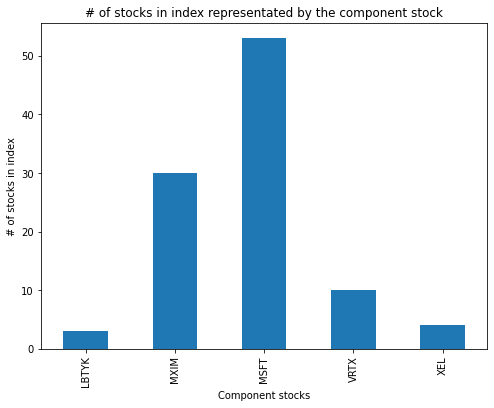

In [19]:
# getting the number of stocks represented by the component stocks
xij_df = pd.DataFrame(x[n:].reshape((n, n)), columns=data_2019.columns[2:], index=data_2019.columns[2:])
plt.figure(figsize=(8, 6))
rep_stock = xij_df.iloc[:, index_selected]
print(rep_stock.sum())
rep_stock.sum().plot(kind='bar')
plt.xlabel('Component stocks')
plt.ylabel('# of stocks in index')
plt.title('# of stocks in index representated by the component stock')
plt.show()

# Portfolio weights selection

In [20]:
# creating index return variable q
q = index_2019

# selecting stock returns
r = stocks_2019[:, index_selected]

**Decision Variables**

1. $w_i$ : weights of stock i selected for the portfolio

2. $y_t$ : max value of possible difference between index return at *t* and weighted return of selected indexes

**Constrains**

1. Sum of weights $w_i$ for *m* stocks in the fund should be 1

2. Difference of index returns and weighted return of stocks should be less than $y_t$


**Total Decision variables - $T$ + $m$**

**Total Constraints - $2*T$ + $1$**

**X vector order for decision variables**

X = [$y_{1}$, ... $y_{T}$ ,  $w_{1}$,$w_{2}$,..., $w_{m}$]

In [21]:
# setting constraints matrix
T = stocks_2019.shape[0]
A = np.zeros((2*T + 1, T + m))
b = np.zeros((2*T + 1))
sense = ['']*A.shape[0]
obj = np.zeros(A.shape[1])

# checking constraint matrix size
print('Shape of constraint matrix', A.shape)

Shape of constraint matrix (501, 255)


**Constrain 1**

In [22]:
A[0, -m:] = 1
b[0] = 1
sense[0] = '='

**Constraint 2**

In [23]:
for t in range(1, T+1):
    # setting coefficient for y_t
    A[t, t - 1] = 1
    A[t + T, t - 1] = 1
    
    # setting coefficient of index return
    A[t, -m:] = r[t - 1, :]
    A[t + T, -m:] = -r[t - 1, :]
    
    # setting b
    b[t] = q[t - 1]
    b[t + T] = -q[t - 1]
    
    # setting direction
    sense[t] = '>'
    sense[t + T] = '>'

**Setting objective**

In [24]:
obj[:T] = 1

**Running the model to get weights**

In [25]:
# running the model
weights_model = create_model(A, sense, b, obj, opt=gp.GRB.MINIMIZE)

<ipython-input-25-cb70a74c8ca0>:2: DeprecationWarning: Deprecated, use Model.addMConstr() instead
  weights_model = create_model(A, sense, b, obj, opt=gp.GRB.MINIMIZE)


In [26]:
# objective function value
weights_model.objVal

0.7891782824631451

In [27]:
# getting index weights
index_weights = weights_model.x[-m:]
index_weights

[0.04886174835252394,
 0.21038806005665583,
 0.5803519807862976,
 0.07119021516911025,
 0.0892079956354124]

# Portfolio performance for 2020 vs 2019

In [28]:
# function to get absolute differnece of index return and portfolio return
def get_portfolio_performance(index_return, stocks_return, stock_weights):
    index_return = np.ravel(index_return)
    folio_return = (stocks_return @ stock_weights)
    folio_return = np.ravel(folio_return)
    
    diff = index_return - folio_return
    
    return folio_return, diff

In [29]:
def get_index_folio_perf(index, portfolio, date):
    
    # creating the plot
    plt.figure(figsize=(20, 8))
    plt.plot(date, index*100, label='Index percentage returns', color='red')
    plt.plot(date, portfolio*100, label='Portfolio percentage returns', color='blue')
    
    plt.legend()
    plt.title('Index vs Portfolio percentage performance')
    plt.xlabel('Trading date')
    plt.ylabel('Returns')
    
    plt.show()

In [30]:
# function to plot diff over the period of time
def get_diff_plot(diff1, diff2, date1=dates_2019[:-1], date2=dates_2020[:-1]):
    
    # creating the plot
    plt.figure(figsize=(20, 8))
    plt.plot(date1, diff1*100, label='2019 Performance Difference ', color='red')
    plt.plot(date2, diff2*100, label='2020 Performance Difference', color='blue')
    
    plt.legend()
    plt.title('Index vs Portfolio percentage performance for 2019 and 2020')
    plt.xlabel('Trading date')
    plt.ylabel('Different in return')
    
    plt.show()

In [31]:
# getting individual stock return in the portfolio for 2020
portfolio_stocks_return = stocks_2020[:, index_selected]

# getting the stock weights within the portfolio
stocks_weights = np.array(index_weights)

In [32]:
# getting portfolio and index diff for 2020 and 2019
portfolio_return_2019, diff_2019 = get_portfolio_performance(
    index_2019, stocks_2019[:, index_selected], stocks_weights)
portfolio_return_2020, diff_2020 = get_portfolio_performance(
    index_2020, portfolio_stocks_return, stocks_weights)

**Index vs Portfolio return for 2019**

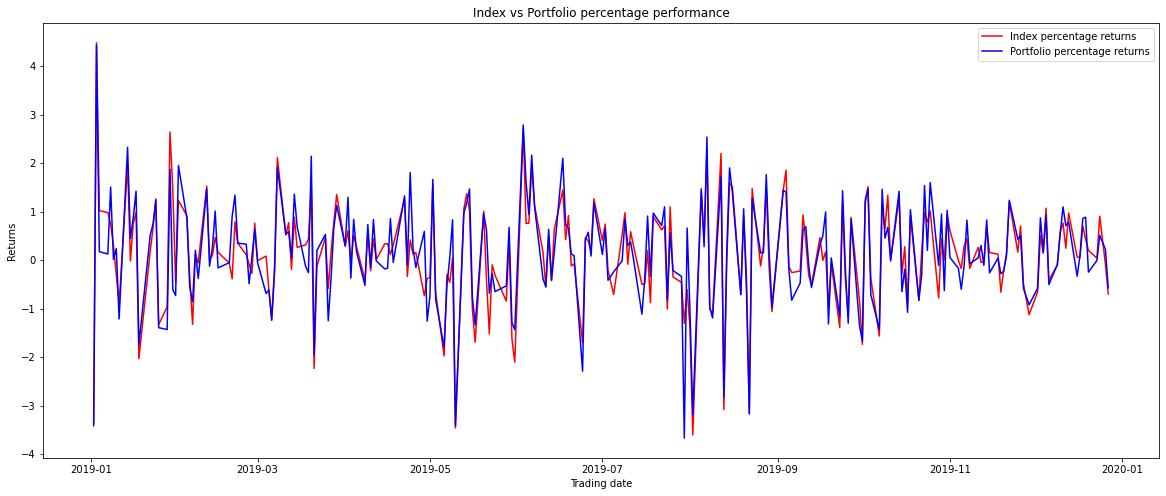

In [33]:
get_index_folio_perf(index_2019, portfolio_return_2019, dates_2019[:-1])

**Index vs Portfolio return for 2020**

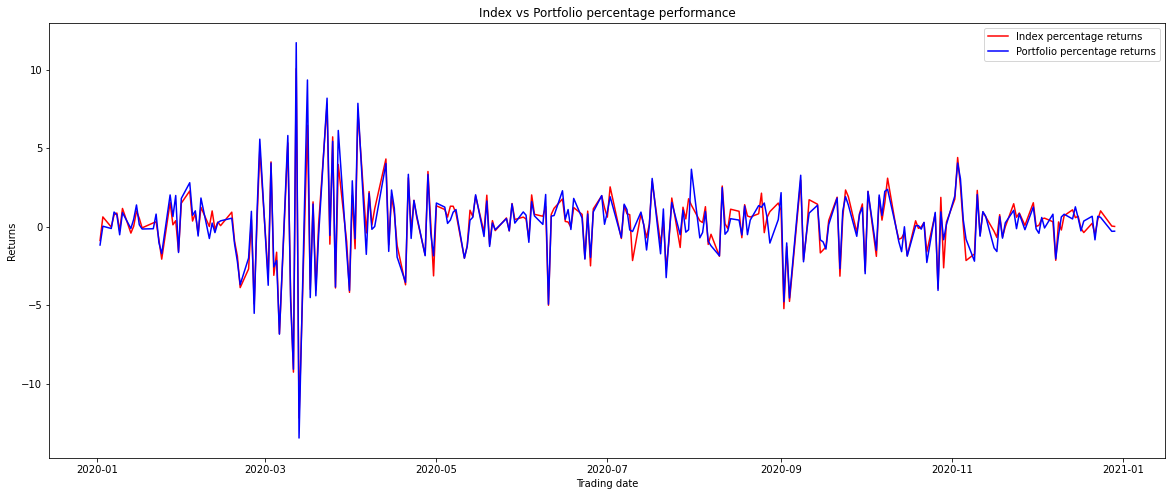

In [34]:
get_index_folio_perf(index_2020, portfolio_return_2020, dates_2020[:-1])

**Performance difference in 2019 vs 2020**

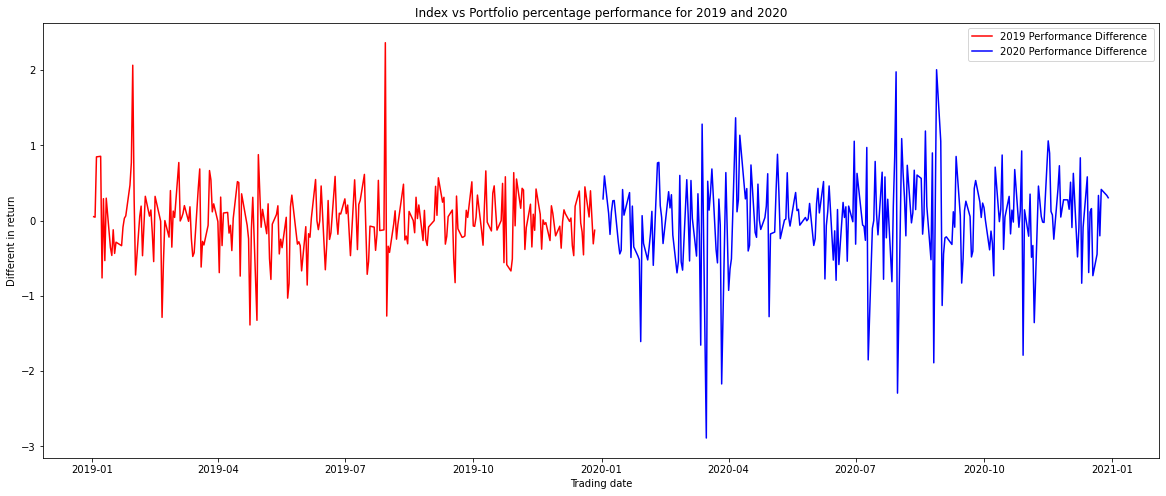

In [35]:
get_diff_plot(diff_2019, diff_2020)

In [36]:
print('2020 Difference in portfolio and index performance is ', np.round(np.sum(np.abs(diff_2020)), 2), '%')

2020 Difference in portfolio and index performance is  1.11 %


# Iterations for different Stock selections m:10, 20, ... 100

### Stock selection for different m

In [37]:
def stock_selection(n, m, rho):
    
    # setting constraints matrix
    A = np.zeros((n*n + n + 1, n*n + n))
    b = np.zeros(n*n + n + 1)
    sense = ['']*A.shape[0]
    vtype = ['B']*A.shape[1]
    obj = np.zeros(A.shape[1])

    # checking constraint matrix size
    # print('Shape of constraint matrix', A.shape)
    
    # constraint 1
    A[0, :n] = 1
    b[0] = m
    sense[0] = '='
    
    # constraint 2
    for i in range(1, n+1):
        col_start = i*n
        col_end = col_start + n
        # print(i, col_start, col_end)
        A[i, col_start:col_end] = np.array([1]*n)
        b[i] = 1
        sense[i] = '='

    # constraint 3
    k = 0
    A[n+1:, n:] = np.diag(np.full(n*n,1))
    for i in range(n):
        for j in range(n):
            A[n + 1 + k, j] = -1
            k+= 1

    sense[n+1:] = ['<']*n**2
    
    # setting objective
    obj[n:] = rho.ravel()
    
    # running the model
    selection_model = create_model(A, sense, b, obj, vtype=vtype)
    
    return A, b, sense, selection_model

In [38]:
# creating differnet values of m
m_vals = np.append(5, np.arange(10, 101, 10))
 
# model storing list
selection_models = []

# selected index list
selected_indexs = []

# iterating over different values of m
for m in m_vals:
    if m <= stocks_2019.shape[1]:
        print('Building model for stock selection for m: ', m)
        _, _, _, model = stock_selection(n, m, rho_2019)

        selection_models.append(model)

        # getting selected index from y_j i.e. first N=100 variables
        x = np.round(model.x[:n])
        index_selected = (np.where(x == 1)[0])
        selected_indexs.append(index_selected)
    
    else:
        print('m is more than the number of stocks available')
    

Building model for stock selection for m:  5


<ipython-input-37-93e54da15a31>:41: DeprecationWarning: Deprecated, use Model.addMConstr() instead
  selection_model = create_model(A, sense, b, obj, vtype=vtype)


Building model for stock selection for m:  10
Building model for stock selection for m:  20
Building model for stock selection for m:  30
Building model for stock selection for m:  40
Building model for stock selection for m:  50
Building model for stock selection for m:  60
Building model for stock selection for m:  70
Building model for stock selection for m:  80
Building model for stock selection for m:  90
Building model for stock selection for m:  100


### Stock weight estimation for different m

In [39]:
# getting performance score
def get_performance_score(index_return, stocks_return, stock_weights):
    _, diff = get_portfolio_performance(index_return, stocks_return, stock_weights)
    score = np.round(np.sum(np.abs(diff)), 2)
    
    return score

In [40]:
def weight_estimation(stock, m, r, q):
    # setting constraints matrix
    T = stock.shape[0]
    A = np.zeros((2*T + 1, T + m))
    # print(A.shape)
    b = np.zeros((2*T + 1))
    sense = ['']*A.shape[0]
    obj = np.zeros(A.shape[1])

        
    # constraint 1
    A[0, -m:] = 1
    b[0] = 1
    sense[0] = '='
    
    # constraint 2
    for t in range(1, T+1):
        # setting coefficient for y_t
        A[t, t - 1] = 1
        A[t + T, t - 1] = 1

        # setting coefficient of index return
        A[t, -m:] = r[t - 1, :]
        A[t + T, -m:] = -r[t - 1, :]

        # setting b
        b[t] = q[t - 1]
        b[t + T] = -q[t - 1]

        # setting direction
        sense[t] = '>'
        sense[t + T] = '>'
        
    # setting objective
    obj[:T] = 1

    # running the model
    weights_model = create_model(A, sense, b, obj, opt=gp.GRB.MINIMIZE)
    
    return A, b, sense, weights_model

In [41]:
# model storing list
weights_models = []

# index weights list
index_weights = []

# creating performance score df
performance_df = pd.DataFrame(data=None, columns=['m', 'in-sample', 'out-sample'])
performance_df['m'] = m_vals

# iterating over different values of m
i = 0
for m in m_vals:
    if m <= stocks_2019.shape[1]:
        # creating return variable r, for selected indexes
        r = stocks_2019[:, selected_indexs[i]]

        print('Building model for weight estimation for m: ', m)
        _, _, _, model = weight_estimation(stocks_2019, m, r, q)

        weights_models.append(model)

        # getting index weights from y_j i.e. first N=100 variables
        weights = model.x[-m:]
        index_weights.append(weights)

        # getting individual stock return in the portfolio for 2020
        portfolio_stocks_return_2020 = stocks_2020[:, selected_indexs[i]]
        portfolio_stocks_return_2019 = stocks_2019[:, selected_indexs[i]]

        # getting the stock weights within the portfolio
        stocks_weights = np.array(weights).ravel()

        # getting performance score
        insample = get_performance_score(index_2019, portfolio_stocks_return_2019, stocks_weights)
        out_sample = get_performance_score(index_2020, portfolio_stocks_return_2020, stocks_weights)

        # appending in the dataframe
        performance_df.iloc[i, 1] = insample
        performance_df.iloc[i, 2] = out_sample

        i += 1
    else:
        print('m is more than the number of stocks available')

Building model for weight estimation for m:  5
Building model for weight estimation for m:  10
Building model for weight estimation for m:  20
Building model for weight estimation for m:  30
Building model for weight estimation for m:  40


<ipython-input-40-228b87a1a049>:38: DeprecationWarning: Deprecated, use Model.addMConstr() instead
  weights_model = create_model(A, sense, b, obj, opt=gp.GRB.MINIMIZE)


Building model for weight estimation for m:  50
Building model for weight estimation for m:  60
Building model for weight estimation for m:  70
Building model for weight estimation for m:  80
Building model for weight estimation for m:  90
Building model for weight estimation for m:  100


In [42]:
index_weights[1]

[0.04420008162515844,
 0.024995874294039724,
 0.021500981845609723,
 0.023389314412141267,
 0.03783494391598762,
 0.15698580809468005,
 0.4910305234120454,
 0.09115180445885859,
 0.04621603180878417,
 0.06269463613269513]

### Comparing in-sample and out sample performance score

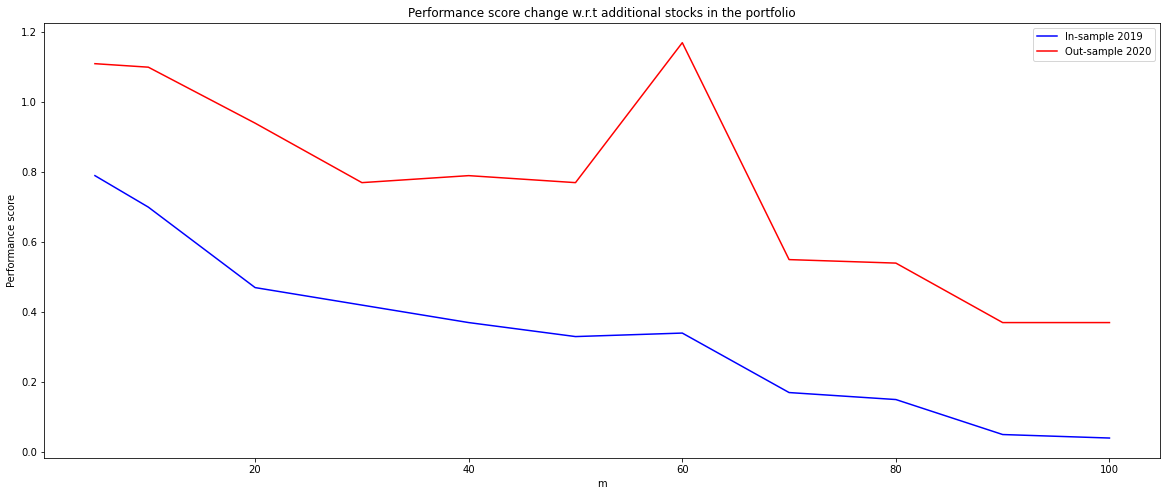

In [43]:
plt.figure(figsize=(20, 8))
plt.plot(performance_df['m'], performance_df['in-sample'], color='blue', label='In-sample 2019')
plt.plot(performance_df['m'], performance_df['out-sample'], color='red', label='Out-sample 2020')

plt.legend()
plt.xlabel('m')
plt.ylabel('Performance score')
plt.title('Performance score change w.r.t additional stocks in the portfolio')
plt.show()

# MIP formulation - Stock selection + Weight estimation

In [44]:
def portfolio_mip(m, n, r, time_limit=10, big_m=1):
    # setting constraints matrix
    T = r.shape[0]
    A = np.zeros((2*T + n + 2, T + 2*n))
    b = np.zeros((2*T + n + 2))
    sense = ['']*A.shape[0]
    obj = np.zeros(A.shape[1])
    vtype = ['C']*(T + n) + ['B']*n

    # checking constraint matrix size
    print('Shape of constraint matrix', A.shape)
    
    # constraint 1
    A[0, T:T+n] = 1
    b[0] = 1
    sense[0] = '='
    
    # constraint 2
    for t in range(1, T+1):
        # setting coefficient for y_t
        A[t, t - 1] = 1
        A[t + T, t - 1] = 1

        # setting coefficient of index return
        A[t, -2*n:-n] = r[t - 1, :]
        A[t + T, -2*n:-n] = -r[t - 1, :]

        # setting b
        b[t] = q[t - 1]
        b[t + T] = -q[t - 1]

        # setting direction
        sense[t] = '>'
        sense[t + T] = '>'
    
    # third constraint
    for i in range(n):
        A[2*T+i+1, T+i] = 1
        A[2*T+i+1, T+n+i] = -big_m
        sense[2*T+i+1] = '<'
        
    # forth constraint
    A[-1, -n:] = 1
    b[-1] = m
    sense[-1] = '='
    
    # setting objective function
    obj[:T] = 1
    
    # running the model
    model = create_model(A, sense, b, obj, opt=gp.GRB.MINIMIZE, vtype=vtype, time_limit=time_limit)
    
    # selected index
    x = np.where(np.array(model.x[T:T+n]) > 0)
    
    return A, b, sense, model, x

In [45]:
# model storing list
mip_models = []

# index selection list
mip_selected_indexs = []

# index weights list
mip_index_weights = []

# creating return variable r, for selected indexes
r = stocks_2019

# creating performance score df
mip_performance_df = pd.DataFrame(data=None, columns=['m', 'in-sample', 'out-sample'])
mip_performance_df['m'] = m_vals

# iterating over different values of m
i = 0
for m in m_vals:
    if m <= stocks_2019.shape[1]:

        print('Building model for weight estimation for m: ', m)
        _, _, _, model, x = portfolio_mip(m, n, r, time_limit)

        mip_models.append(model)

        # getting selected index from model
        mip_selected_indexs.append(x)

        # getting index weights from y_j i.e. first N=100 variables
        weights = model.x[-2*n:-n]

        # getting the stock weights within the portfolio
        stocks_weights = np.array(weights).ravel()
        mip_index_weights.append(stocks_weights)

        # getting performance score
        insample = get_performance_score(index_2019, stocks_2019, stocks_weights)
        out_sample = get_performance_score(index_2020, stocks_2020, stocks_weights)

        # appending in the dataframe
        mip_performance_df.iloc[i, 1] = insample
        mip_performance_df.iloc[i, 2] = out_sample
        
        # converting into a dataframe for different values of m
        weights_df = pd.DataFrame(stocks_weights, index=data_2019.columns[2:])
        weights_df.to_csv('mip_weights_df_1hr_{}.csv'.format(m), index=False)
        # weights_df.to_csv('mip_weights_df_{}.csv'.format(m), index=False)

        i += 1
    else:
        print('m is more than the number of stocks available') 


Building model for weight estimation for m:  5
Shape of constraint matrix (602, 450)


<ipython-input-44-a5b713df3d7b>:51: DeprecationWarning: Deprecated, use Model.addMConstr() instead
  model = create_model(A, sense, b, obj, opt=gp.GRB.MINIMIZE, vtype=vtype, time_limit=time_limit)


Building model for weight estimation for m:  10
Shape of constraint matrix (602, 450)
Building model for weight estimation for m:  20
Shape of constraint matrix (602, 450)
Building model for weight estimation for m:  30
Shape of constraint matrix (602, 450)
Building model for weight estimation for m:  40
Shape of constraint matrix (602, 450)
Building model for weight estimation for m:  50
Shape of constraint matrix (602, 450)
Building model for weight estimation for m:  60
Shape of constraint matrix (602, 450)
Building model for weight estimation for m:  70
Shape of constraint matrix (602, 450)
Building model for weight estimation for m:  80
Shape of constraint matrix (602, 450)
Building model for weight estimation for m:  90
Shape of constraint matrix (602, 450)
Building model for weight estimation for m:  100
Shape of constraint matrix (602, 450)


In [46]:
mip_performance_df

,m,in-sample,out-sample
0,5,0.69,1.34
1,10,0.59,0.93
2,20,0.37,0.63
3,30,0.21,0.48
4,40,0.23,0.54
5,50,0.15,0.55
6,60,0.13,0.59
7,70,0.06,0.38
8,80,0.06,0.38
9,90,0.04,0.37


In [47]:
performance_df

,m,in-sample,out-sample
0,5,0.79,1.11
1,10,0.7,1.1
2,20,0.47,0.94
3,30,0.42,0.77
4,40,0.37,0.79
5,50,0.33,0.77
6,60,0.34,1.17
7,70,0.17,0.55
8,80,0.15,0.54
9,90,0.05,0.37


### Comparing in-sample and out sample performance score

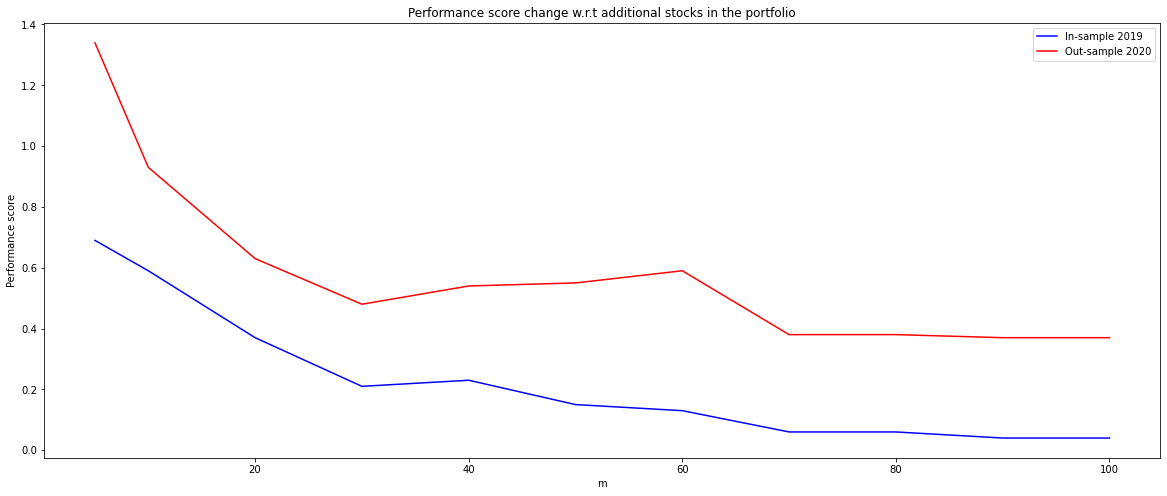

In [48]:
plt.figure(figsize=(20, 8))
plt.plot(mip_performance_df['m'], mip_performance_df['in-sample'], color='blue', label='In-sample 2019')
plt.plot(mip_performance_df['m'], mip_performance_df['out-sample'], color='red', label='Out-sample 2020')

plt.legend()
plt.xlabel('m')
plt.ylabel('Performance score')
plt.title('Performance score change w.r.t additional stocks in the portfolio')
plt.show()

### Saving the MIP output

In [54]:
# converting into a dataframe for different values of m
weights_df = pd.DataFrame(mip_index_weights, columns=data_2019.columns[2:])
weights_df.loc[:len(weights_df), 'm'] = m_vals
cols = list(weights_df.columns)
weights_df = weights_df[cols[-1:] + cols[:-1]]
weights_df

,m,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
0,5,0.000000,0.181569,0.000000,0.000000,0.000000,0.000000,0.000000,0.324298,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.196769,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,20,0.015250,0.065585,0.000000,0.012777,0.000000,0.000000,0.116175,0.149596,0.062030,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037377
3,30,0.012407,0.036571,0.000000,0.014929,0.000000,0.102694,0.000000,0.134310,0.031614,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012380,0.000164
4,40,0.005025,0.012494,0.000000,0.000000,0.000000,0.117387,0.000000,0.000000,0.022194,...,0.000000,0.000000,0.035152,0.000000,0.015205,0.000000,0.000000,0.000000,0.000000,0.000000
5,50,0.006285,0.054093,0.004264,0.000000,0.000000,0.025715,0.071649,0.125227,0.002003,...,0.000000,0.004266,0.000000,0.000000,0.000000,0.013925,0.000000,0.000000,0.000000,0.000000
6,60,0.000000,0.034455,0.002985,0.003072,0.004068,0.000000,0.096397,0.125352,0.007185,...,0.000000,0.000000,0.000000,0.021616,0.009918,0.009718,0.007204,0.000000,0.000000,0.000000
7,70,0.007659,0.021766,0.004197,0.004857,0.000000,0.089190,0.000000,0.100166,0.015501,...,0.000000,0.002793,0.000000,0.013998,0.000000,0.011137,0.000000,0.000000,0.008634,0.007080
8,80,0.004986,0.020888,0.005176,0.002563,0.000000,0.080395,0.006579,0.100864,0.012245,...,0.002099,0.003623,0.000000,0.000000,0.000000,0.007777,0.003062,0.000246,0.000000,0.000000
9,90,0.004240,0.017147,0.004030,0.002461,0.000000,0.056994,0.029636,0.095645,0.013617,...,0.000440,0.003841,0.006157,0.006654,0.008890,0.009129,0.002561,0.000000,0.003679,0.005405


In [50]:
weights_df.to_csv('mip_weights_df.csv', index=False)

with pd.ExcelWriter('performance.xlsx') as writer:
    mip_performance_df.to_excel(writer, index=False, sheet_name='mip')
    performance_df.to_excel(writer, index=False, sheet_name='non-mip')